<a href="https://colab.research.google.com/github/finaali/Project/blob/main/Diabetes_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install pandas

In [5]:
!pip install numpy

In [6]:
!pip install seaborn

In [7]:
!pip install matplotlib

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## Import Data

In [10]:
df = pd.read_csv('Diabetes.csv', index_col=0)
df

,Kehamilan,Glukosa,Tekanan Darah,Ketebalan Kulit,Insulin,BMI,DiabetesPedigreeFunction,Umur,Hasil
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## 1. Data Understanding

In [11]:
print("Data Shape : ", df.shape)

Data Shape :  (768, 9)


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Kehamilan                 768 non-null    int64  
 1   Glukosa                   768 non-null    int64  
 2   Tekanan Darah             768 non-null    int64  
 3   Ketebalan Kulit           768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Umur                      768 non-null    int64  
 8   Hasil                     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 60.0 KB


In [13]:
df[['Kehamilan', 'Tekanan Darah', 'Umur', 'BMI']].describe()

,Kehamilan,Tekanan Darah,Umur,BMI
count,768.000000,768.000000,768.000000,768.000000
mean,3.845052,69.105469,33.240885,31.992578
std,3.369578,19.355807,11.760232,7.884160
min,0.000000,0.000000,21.000000,0.000000
25%,1.000000,62.000000,24.000000,27.300000
50%,3.000000,72.000000,29.000000,32.000000
75%,6.000000,80.000000,41.000000,36.600000
max,17.000000,122.000000,81.000000,67.100000


In [14]:
df.Hasil.value_counts()

0    500
1    268
Name: Hasil, dtype: int64

## 2. Cleaning Data

In [15]:
df.isnull().sum()

Kehamilan                   0
Glukosa                     0
Tekanan Darah               0
Ketebalan Kulit             0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Umur                        0
Hasil                       0
dtype: int64

In [16]:
df.duplicated().sum()

0

## 3. Exploratory Data Analysis (EDA)

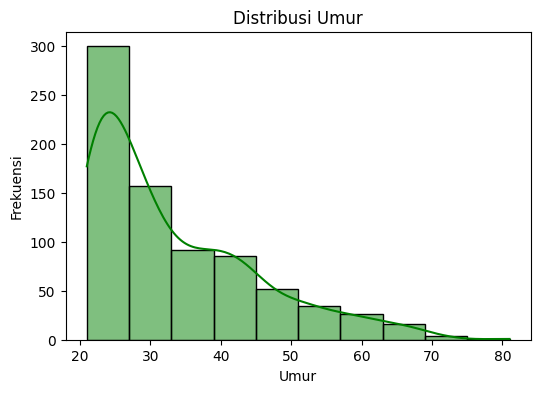

In [17]:
plt.figure(figsize=(6,4))
sns.histplot(data=df, x='Umur', bins=10, kde=True, color='green')

plt.title('Distribusi Umur')
plt.xlabel('Umur')
plt.ylabel('Frekuensi')
plt.show()

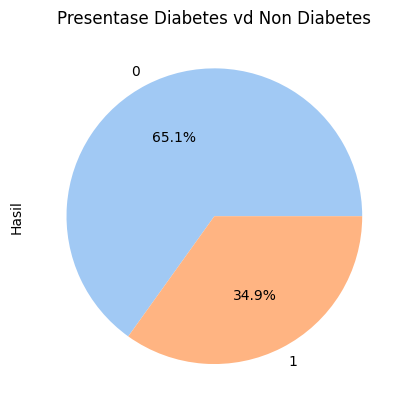

In [18]:
sns.set_palette('pastel')
df['Hasil'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Presentase Diabetes vd Non Diabetes')
plt.show()

<ipython-input-21-49b9fc85ed16>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Hasil', palette='rocket')


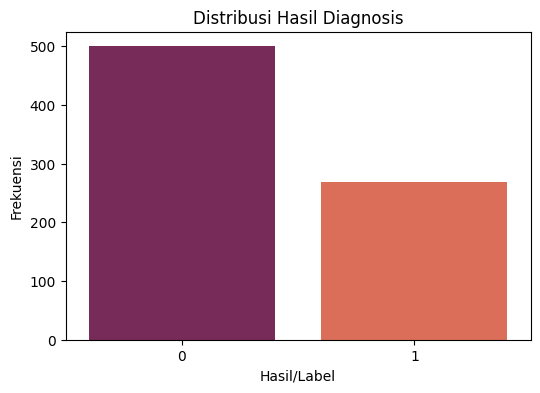

In [21]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Hasil', palette='rocket')

plt.title('Distribusi Hasil Diagnosis')
plt.xlabel('Hasil/Label')
plt.ylabel('Frekuensi')
plt.show()

In [22]:
df.corr()

,Kehamilan,Glukosa,Tekanan Darah,Ketebalan Kulit,Insulin,BMI,DiabetesPedigreeFunction,Umur,Hasil
Kehamilan,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glukosa,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
Tekanan Darah,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
Ketebalan Kulit,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Umur,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Hasil,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

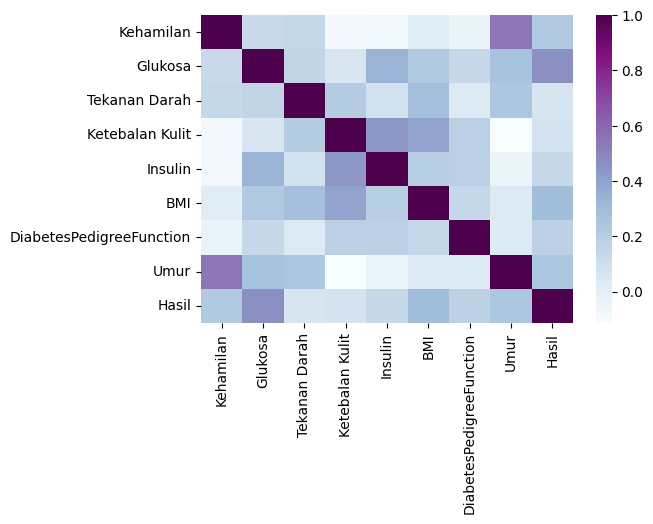

In [24]:
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(), cmap='BuPu')

## 4. Preparation Data

In [ ]:
x=df.drop(columns=['Hasil'])
y=df['Hasil']